Import Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)
    
df_2014_2019 = pd.read_csv("df_2014-2019", index_col=0) 

In [29]:
df = pd.concat([df_2014_2019, df_raw])

Additional Settings

In [19]:
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import ticker
import matplotlib.patches as mpatches

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

#setting matplotlib style
plt.style.use('default')

#setting params for matplolib plots
plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title
plt.rcParams['xtick.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.size']=3.5  # fontsize of the figure title
#plt.rcParams['xtick.major.width']=1  # fontsize of the figure title
plt.rcParams['xtick.major.top']=False  # fontsize of the figure title
plt.rcParams['xtick.minor.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.minor.size']=3  # fontsize of the figure title
#plt.rcParams['legend.fontsize'] = 22

#setting grid style
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

In [32]:
#getting relevant data
df_assets = df_raw[["rssdid","bhcid",  "name", 'year', "quarter","assets", "cash"
             ,"fedfundsrepoasset" ,"securities","loansnet", "tradingassets"]]

df_assets_2014 = df_2014_2019[["rssdid",  "name", 'year', "quarter","assets", "cash"
             ,"fedfundsrepoasset" ,"securities","loansnet", "tradingassets"]]

df_assets2 = df[["rssdid","bhcid",  "name", 'year', "quarter","assets", "cash"
             ,"fedfundsrepoasset" ,"securities","loansnet", "tradingassets"]]

In [33]:
df_assets_concat = pd.concat([df_assets, df_assets_2014])

In [43]:
df_agg = df_assets_concat.groupby(["year", "quarter"]).sum()

df_agg1 = df_assets2.groupby(["year", "quarter"]).sum()

df_agg1 =df_agg1.reset_index()

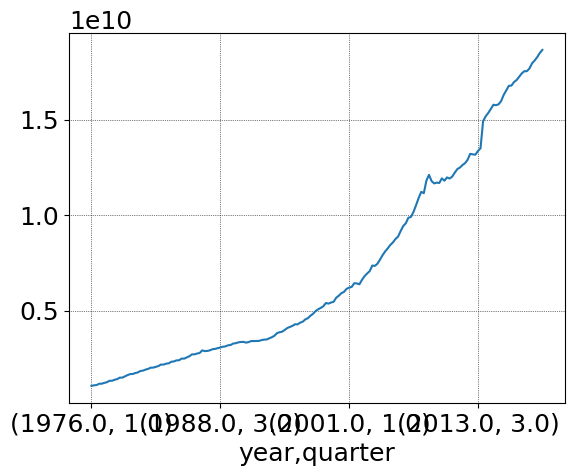

In [41]:
df_agg.assets.plot(grid=True)


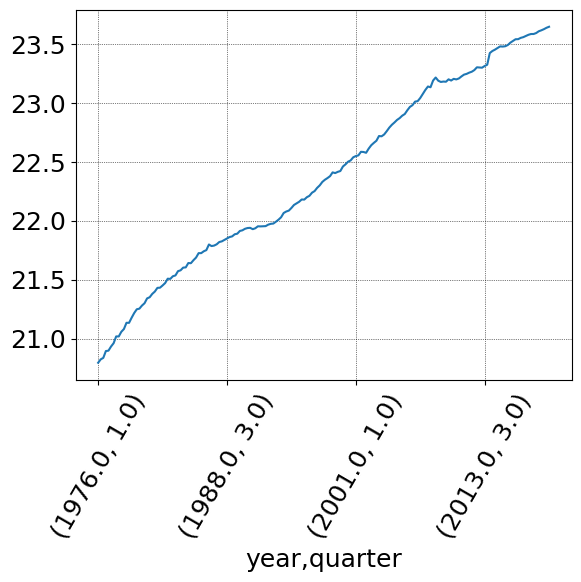

In [40]:
np.log(df_agg1.assets).plot(grid=True, rot=60)

In [47]:
df_agg1[df_agg1.year==2013]

,year,quarter,rssdid,bhcid,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets
148,2013.0,1.0,6.466822e+09,9.957780e+09,1.319233e+10,1.387868e+09,445119695.0,2.714481e+09,6.767474e+09,717317350.0
149,2013.0,2.0,6.368224e+09,9.886000e+09,1.317578e+10,1.416118e+09,426842665.0,2.658847e+09,6.835070e+09,652111720.0
150,2013.0,3.0,6.313098e+09,9.832671e+09,1.336706e+10,1.597992e+09,426121135.0,2.662613e+09,6.908212e+09,608093221.0
151,2013.0,4.0,6.226239e+09,9.767610e+09,1.350882e+10,1.600496e+09,424085949.0,2.706214e+09,7.011800e+09,607053046.0


In [48]:
df_agg1[df_agg1.year==2014]

,year,quarter,rssdid,bhcid,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets
152,2014.0,1.0,2.126768e+10,0.0,1.492040e+10,1.820088e+09,44573919.0,0.0,7.719472e+09,598120369.0
153,2014.0,2.0,2.096093e+10,0.0,1.518294e+10,1.848312e+09,43510859.0,0.0,7.868407e+09,603782131.0
154,2014.0,3.0,2.067629e+10,0.0,1.535912e+10,1.906680e+09,34234354.0,0.0,7.933141e+09,640674548.0
155,2014.0,4.0,2.037801e+10,0.0,1.556402e+10,1.926304e+09,29937344.0,0.0,8.080574e+09,655648226.0
